In [24]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [25]:
# read first n rows and columns
filename = 'GarmonData.csv'
df = pd.read_csv(filename, skiprows=0, usecols = ['TEMPC','SOLARRADIATION','WINDSPEEDKMH','RAININ'])

In [26]:
df_0 = df[0:-1]
print(df_0)
print(df['TEMPC'][0:-1])

         TEMPC  WINDSPEEDKMH  RAININ  SOLARRADIATION
0         19.7          1.64     0.0           51.13
1         19.4          2.56     0.0           59.70
2         19.0          0.72     0.0           44.51
3         18.6          1.02     0.0           39.50
4         18.2          0.49     0.0           35.09
...        ...           ...     ...             ...
3549836   11.4          4.03     0.0            0.00
3549837   11.4          2.61     0.0            0.00
3549838   11.4          5.09     0.0            0.00
3549839   11.4          4.23     0.0            0.00
3549840   11.4          5.29     0.0            0.00

[3549841 rows x 4 columns]
0          19.7
1          19.4
2          19.0
3          18.6
4          18.2
           ... 
3549836    11.4
3549837    11.4
3549838    11.4
3549839    11.4
3549840    11.4
Name: TEMPC, Length: 3549841, dtype: float64


In [27]:
print(df['TEMPC'][1:].to_numpy())

[19.4 19.  18.6 ... 11.4 11.4 11.4]


In [28]:
df_next = df_0.copy()
df_next['TEMPC+1'] = pd.Series(df['TEMPC'][1:].to_numpy(), index=df_0.index)
df_next['RAININ+1'] = pd.Series(df['RAININ'][1:].to_numpy(), index=df_0.index)
df_next['SOLARRADIATION+1'] = pd.Series(df['SOLARRADIATION'][1:].to_numpy(), index=df_0.index)
df_next = df_next[['TEMPC', 'TEMPC+1', 'RAININ', 'RAININ+1', 'SOLARRADIATION', 'SOLARRADIATION+1']]
print(df_next)
# pd.Series(np.random.randn(sLength), index=df1.index)

         TEMPC  TEMPC+1  RAININ  RAININ+1  SOLARRADIATION  SOLARRADIATION+1
0         19.7     19.4     0.0       0.0           51.13             59.70
1         19.4     19.0     0.0       0.0           59.70             44.51
2         19.0     18.6     0.0       0.0           44.51             39.50
3         18.6     18.2     0.0       0.0           39.50             35.09
4         18.2     17.9     0.0       0.0           35.09             31.34
...        ...      ...     ...       ...             ...               ...
3549836   11.4     11.4     0.0       0.0            0.00              0.00
3549837   11.4     11.4     0.0       0.0            0.00              0.00
3549838   11.4     11.4     0.0       0.0            0.00              0.00
3549839   11.4     11.4     0.0       0.0            0.00              0.00
3549840   11.4     11.4     0.0       0.0            0.00              0.00

[3549841 rows x 6 columns]


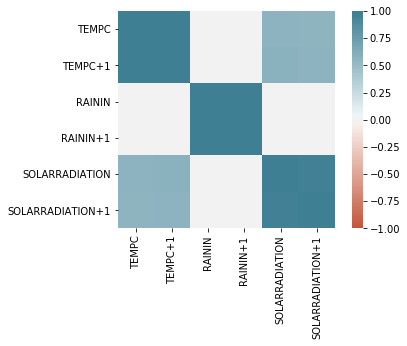

In [29]:
# create correlation matrix
corr = df_next.corr()
# plot correlation matrix for all the data
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
);